## Yield dataset (univariate)

This data set of size $m  = 15$ (Yield data) contains measurements of yield from an experiment done at five different temperature levels. The variables are yield and temperature in degrees Fahrenheit. The table below gives the data used for this analysis.


In [1]:
import numpy as np
import urllib.request

# Download the file from `url` and save it locally under `file_name`:
url, file_name = "http://statweb.stanford.edu/~candes/teaching/math104/Handouts/", "yield.txt"
urllib.request.urlretrieve(url + file_name, file_name)
# Read data file
data = np.loadtxt('yield.txt', skiprows = 1, dtype='float')
print(data)

[[  1.   50.    3.3]
 [  2.   50.    2.8]
 [  3.   50.    2.9]
 [  4.   70.    2.3]
 [  5.   70.    2.6]
 [  6.   70.    2.1]
 [  7.   80.    2.5]
 [  8.   80.    2.9]
 [  9.   80.    2.4]
 [ 10.   90.    3. ]
 [ 11.   90.    3.1]
 [ 12.   90.    2.8]
 [ 13.  100.    3.3]
 [ 14.  100.    3.5]
 [ 15.  100.    3. ]]


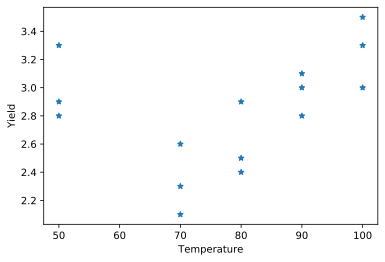

In [2]:
Temp = data[:,1]
Yield = data[:,2]

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

plt.plot(Temp,Yield,'*')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.show()

## Diabetes dataset (multivariate)

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

- Number of instances: 442
- Number of attributes: 10

Attribute Information: 
- Age
- Sex
- Body mass index
- Average blood pressure
- S1
- S2
- S3
- S4
- S5
- S6

Response: quantitative measure of disease progression one year after baseline


In [3]:
# Download the file from `url` and save it locally under `file_name`:
urllib.request.urlretrieve(url + 'multivariate_attribute.txt', 'multivariate_attribute.txt')
urllib.request.urlretrieve(url + 'multivariate_response.txt', 'multivariate_response.txt')

# Read data files
attribute = np.loadtxt('multivariate_attribute.txt')
response = np.loadtxt('multivariate_response.txt')
print(attribute.shape)
print(response.shape)

(442, 10)
(442,)


In [4]:
# Let us create a training and test set
def train_test_split(A,b,test_size = 0.2):
    nsamples = A.shape[0]
    ntest = int(nsamples*test_size)
    ntrain = nsamples - ntest
    id_test = np.random.choice(nsamples,ntest,replace=False)
    in_test = np.array(np.zeros(nsamples),dtype=bool) # All false 
    in_test[id_test] = True
    
    return A[~in_test], A[in_test], b[~in_test], b[in_test]

np.random.seed(seed=94305) # We should all have the same test and training sets
A_train, A_test, b_train, b_test = train_test_split(
    np.c_[np.ones(attribute.shape[0]),attribute],
    response)
print(A_train.shape, b_train.shape)
print(A_test.shape,  b_test.shape)

(354, 11) (354,)
(88, 11) (88,)
